# Plotting emission factors

In [18]:
from IPython.core.display import HTML
HTML("<style>.container { width:100% !important; }</style>")

In [19]:
import numpy as np
import pyprind
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import pickle

plt.style.use('seaborn')
%matplotlib inline

In [20]:
#Reading in emission factors
df = pd.read_excel('HBEFA_emission_factors.xlsx', header = 1)
df.rename(columns={'Unnamed: 0':'category'}, inplace=True)

In [21]:
df = df[['category', 'powertrain', 'size', 'parameter', 'pre Euro 0', 'Euro 0 ', 'Euro 1', 'Euro 2', 'Euro 3', 'Euro 4', 'Euro 5', 'Euro 6']]
df.set_index(['category', 'powertrain','size', 'parameter'], inplace = True)
emissions = ['Benzene', 'CH4', 'CO',
       'HC', 'N2O', 'NH3', 'NMHC', 'NO2', 'NOx', 'PM', 'PN', 'Pb', 'SO2',
       'kilometers per year', 'lifetime kilometers']

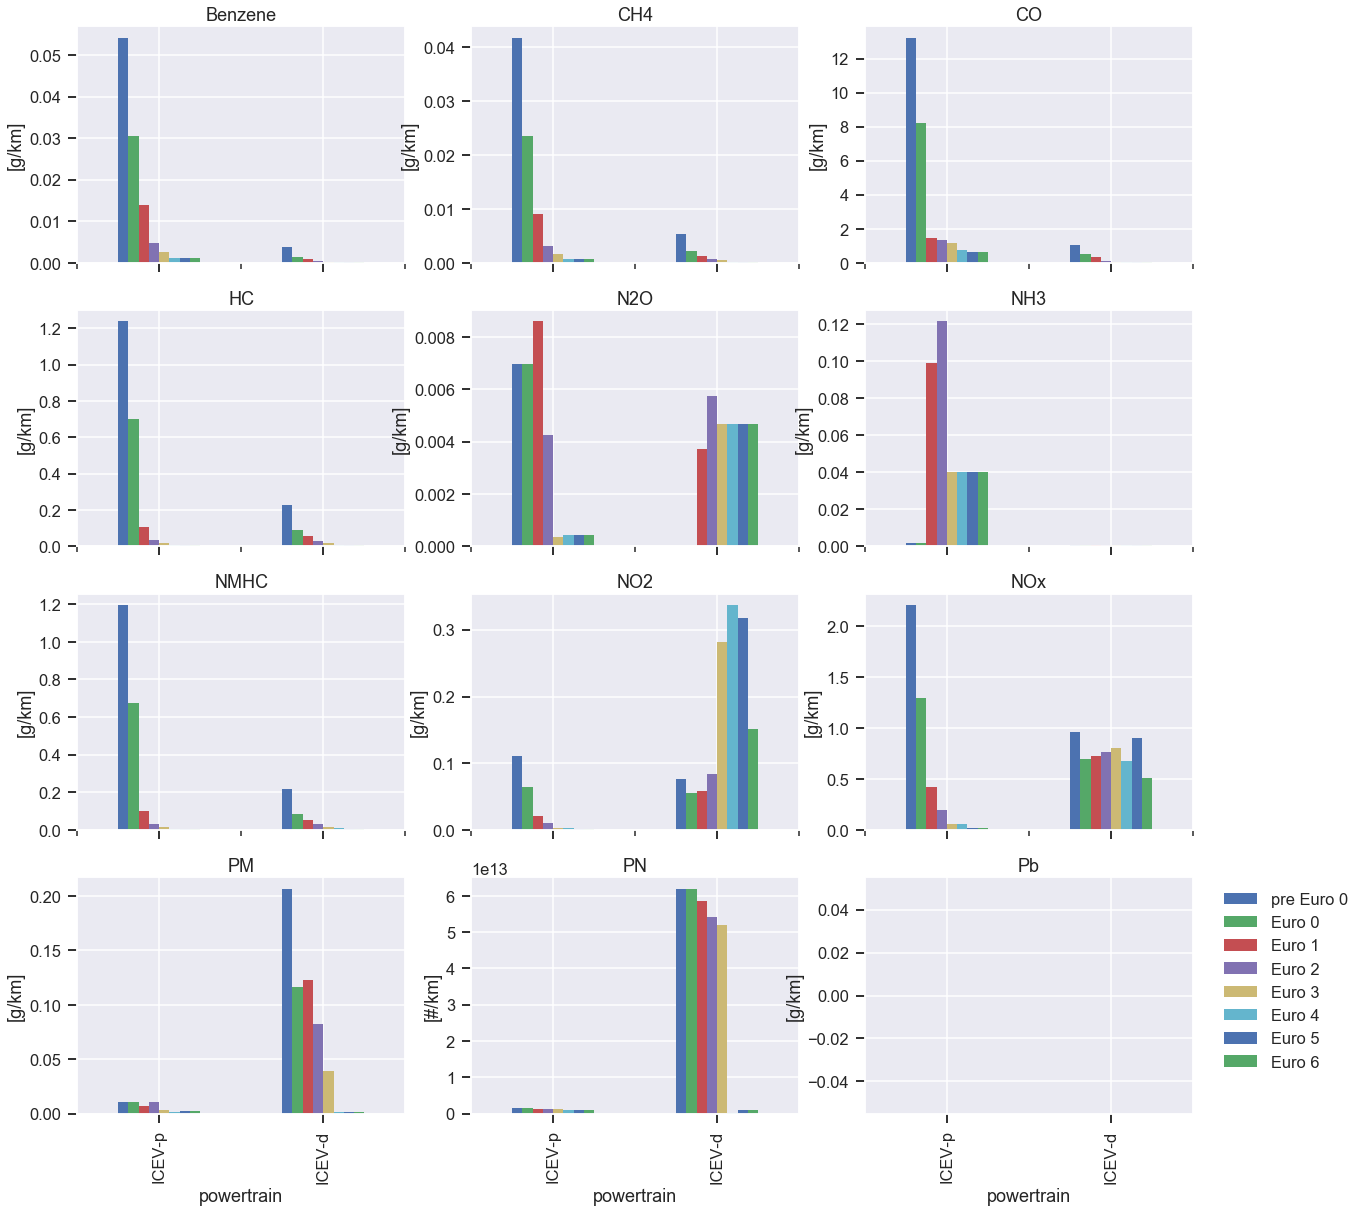

In [22]:
#Plotting air pollutants, emission factors - size independent
fig = plt.figure(figsize = (20,20))
i = 1
sns.set_context("talk")
for efa in df.xs(['Air pollutants', 'ICEV-p', 'all'], level = [0, 1,2]).reset_index()['parameter'].tolist():
    ax = fig.add_subplot(4,3,i)
    ylabel = '[g/km]'
    if efa == 'PN':
        ylabel = '[#/km]'
    df.xs(['Air pollutants', 'all', efa], level = [0,2,3]).plot.bar(title = efa, ax = ax, sharex = True, legend = None).set_ylabel(ylabel)
    i+=1
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.5)

In [23]:
fig.subplots_adjust(wspace = 0.3, hspace = 0.3) #adjusting space between subplots
fig.tight_layout()
fig.savefig('air_poll_plot.svg')

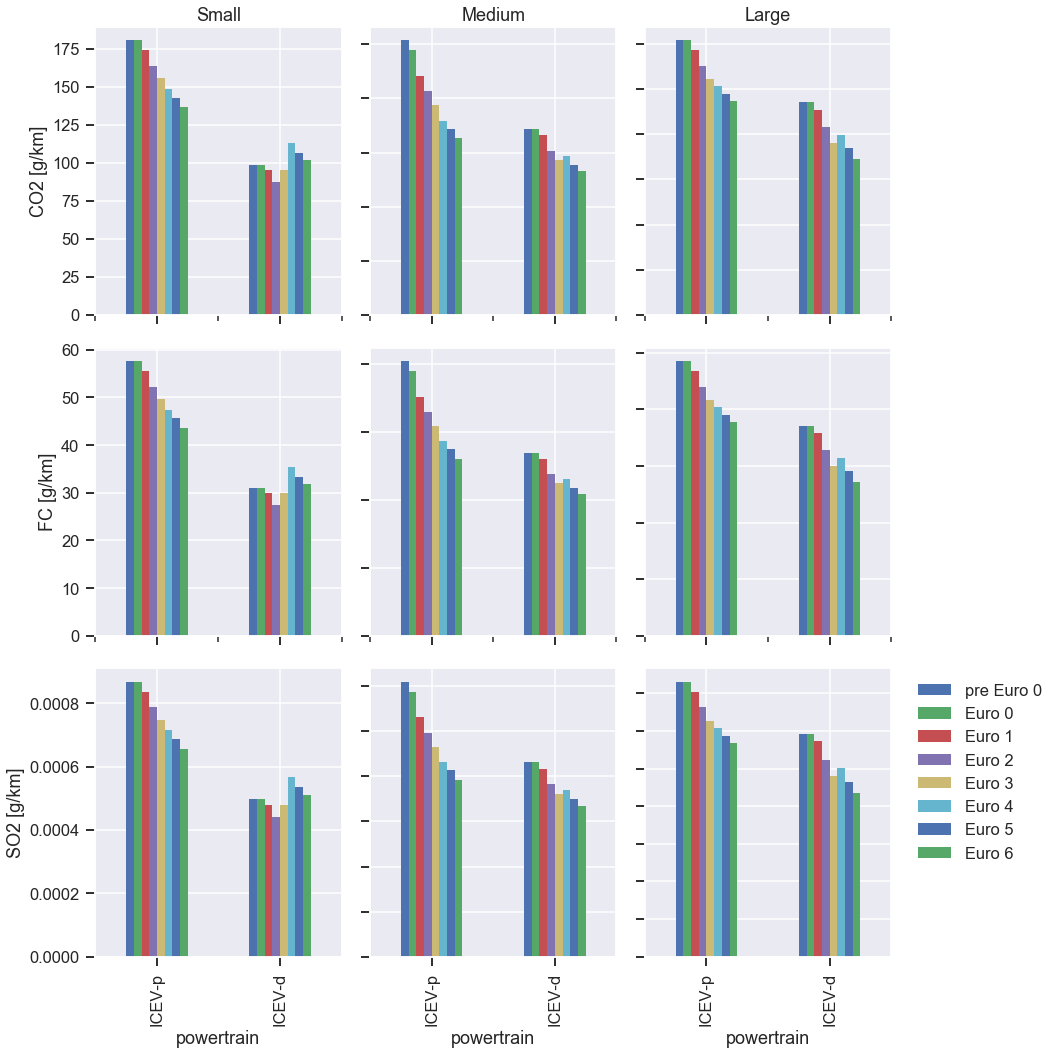

In [24]:
#Plotting size dependent emissions
sizes = ['Small', 'Medium', 'Large']
#size_dep_emissions = ['CO2(total)', 'FC', 'SO2']
#df.xs(['Fuel and emissions', 'Mini', 'CO2(total)'], level = [0,2,3])

#for CO2 or fuel consumption plotting
fig = plt.figure(figsize = (15,15))
i = 1
for s in sizes:
    ax = fig.add_subplot(3,3,i)
    ylabel = 'CO2 [g/km]'
    df.xs(['Fuel and emissions', s, 'CO2(total)'], level = [0,2,3]).plot.bar(title = s, ax = ax, sharex = True, sharey = True, legend = None).set_ylabel(ylabel)
    i+=1

for s in sizes:
    ax = fig.add_subplot(3,3,i)
    ylabel = 'FC [g/km]'
    df.xs(['Fuel and emissions', s, 'FC'], level = [0,2,3]).plot.bar(ax = ax, sharex = True, sharey = True, legend = None).set_ylabel(ylabel)
    i+=1

#for so2 plotting
#fig = plt.figure()
#i = 1
for s in sizes:
    ax = fig.add_subplot(3,3,i)
    ylabel = 'SO2 [g/km]'
    df.xs(['Air pollutants', s, 'SO2'], level = [0,2,3]).plot.bar(ax = ax, sharex = True, sharey = True, legend = None).set_ylabel(ylabel)
    i+=1

ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.5)
fig.tight_layout()
fig.savefig('air_poll_size_dep.svg')
